## **Analysing Infrastructures in Singapore**

Name : Wong Thai Siang

Title : Investigating Resale and Rent Prices of HDB flats in Singapore.

        
<hr>

In [24]:
import numpy as np
import matplotlib.pyplot as plt

<h1> Analysis 1</h1>
<h2>"What are the usual prices Singaporeans pay for HDB resale flats?"</h2>
<h3>Hypothesis: "Usual Prices are around 600k SGD"</h3>
<hr>
<br>
I will be using the Resale Flat Prices dataset to carry out my Investigation. 

In the Resale Flat Prices dataset, it is split up into a series of csv files, each containing a different time frame. For this investigation, I decided to only use the dataset dating from 2017 onwards as using older data would not give a accurate representation of the usual resale prices as of this investigation (2023). 

The columns present in the csv file are: month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price.

In the investigation, I extracted the resale prices and the median of the resale prices as they are relevant information in finding the distribution of resale prices.

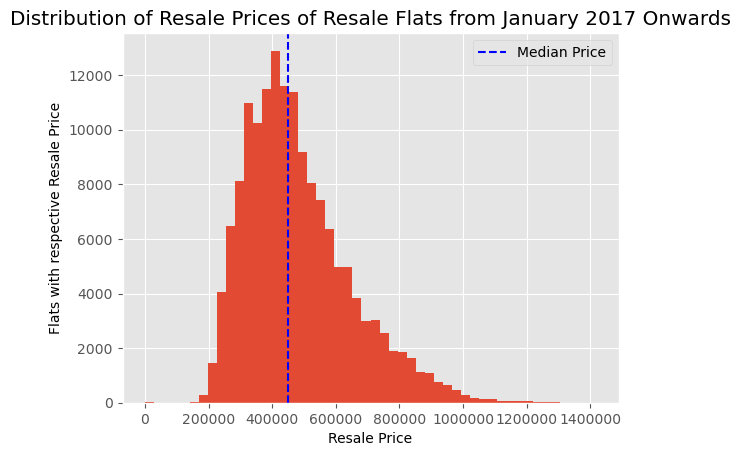

In [25]:



data = np.genfromtxt("./datasets/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv",
                     dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',  'U20',  'i8'], delimiter=",",names=True)
price = data[:]["resale_price"]

plt.title('Distribution of Resale Prices of Resale Flats from January 2017 Onwards')
plt.ylabel('Flats with respective Resale Price')
plt.xlabel("Resale Price")
plt.style.use("ggplot")
plt.hist(price, bins =50)
plt.ticklabel_format(style='plain', axis='x')                                                                                                           
avg_price = np.median(price)
plt.axvline(avg_price, color='b', linestyle='--', label="Median Price")
plt.legend()
plt.show()

From the histogram above and to answer my question ,"What are the usual prices Singaporeans pay for HDB resale flats?", I can conclude that Singaporeans usually pay around 400000 - 440000 SGD for resale flats from the line drawn to indicate the Median Price. 

The histogram also shows the distribution of resale flat prices, giving more information about how much Singaporeans pay for resale flats. From the histogram, I can conclude that there are significantly lesser Singaporeans that pays for resale flats which prices >=1000000SGD

From the information gathered, I would recommend Singaporeans who are looking to buy resale flats to look at resale flats with prices around 400000, and they should not expect to spend more than 700000. As they would be paying too much for resale.


<h1>Analysis 2</h1>
<h2>"How has resale prices of the different flat types in Singapore changed over the years? Are the increments big every year? "</h2>
<h3>Hypothesis: "The prices increases greatly every year."</h3>
<hr>
<br>
I will be using the Resale Flat Prices dataset to carry out my investigation. 

Unlike in Analysis 1, I will be using the whole dataset given, using CSV files with information dating to 1990 as I want to see the trend clearly over time.

To do so, I combined all the Numpy Arrays generated from the CSV files into one array called combined_data. With having information dating back to 1990, the combined_data had a big sample size of 899209. This will help create a more accurate chart to represent the trend of the Resale Price changes every year.

In the datasets, it had a column, 'month', which had the format of year-month. This was not ideal as for some months, there was no data collected for the flat type. If used, it would create gaps within the chart. To mitigate this issue, I changed the 'month' column's format to year. 

There was inconsistent naming within the dataset, and it was corrected as well.





/tmp/ipykernel_3887/4002650769.py:45: RuntimeWarning: Mean of empty slice.
  avg_price = resale_price.mean()


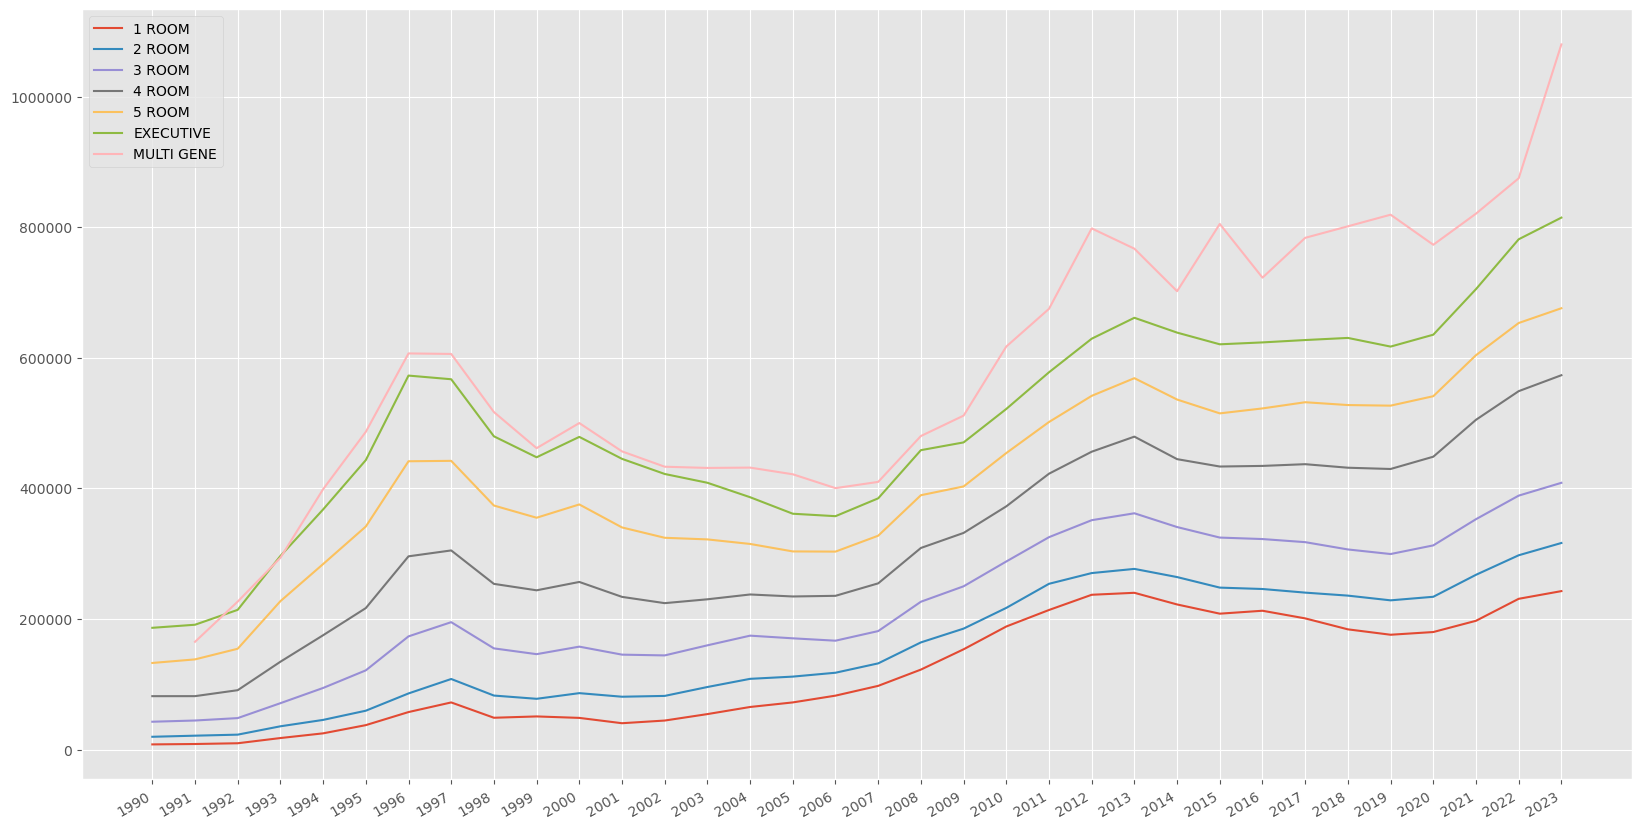

In [33]:
# Merging resale prices from 1990
data1990_1999 = np.genfromtxt('./datasets/resale-flat-prices-based-on-approval-date-1990-1999.csv',
                               dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8', 'i8'], delimiter = ",", names = True)
data2000_2012 = np.genfromtxt('./datasets/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv',
                               dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',  'i8'], delimiter = ",", names=True)
data2012_2014 = np.genfromtxt('./datasets/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv',
                               dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',   'i8'],
                                delimiter=",",names=True)
data2014_2016 = np.genfromtxt('./datasets/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv',
                               dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',    'i8'],
                                usecols=(0,1,2,3,4,5,6,7,8,10),delimiter=",",names=True)
data2017_onwards = np.genfromtxt('./datasets/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv',
                                  dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',    'i8'],
                                   usecols=(0,1,2,3,4,5,6,7,8,10), delimiter=",",names=True)

combined_data = np.concatenate((data1990_1999, data2000_2012, data2012_2014, data2014_2016, data2017_onwards))

for i in range(len(combined_data)):
    # change month to year
    combined_data[i]['month'] = combined_data[i]["month"][:4]
    # fixing inconsistent naming for multi gene
    if combined_data[i]['flat_type'] == 'MULTI-GENE':
        combined_data[i]['flat_type'] = "MULTI GENE"
     

years = np.unique(combined_data['month'])
flats = np.unique(combined_data['flat_type'])


rooms =  {
     '1 ROOM': [],
     '2 ROOM': [],
     '3 ROOM': [],
     '4 ROOM': [],
     '5 ROOM': [],
     'EXECUTIVE' :[],
     'MULTI GENE': [],
     'years': years
}
   
for i in years:
    for n in flats:
        # append mean price to rooms
        resale_price = combined_data[(combined_data['flat_type'] == n) & (combined_data['month'] == i)]['resale_price']
        avg_price = resale_price.mean()
        rooms[n].append([avg_price]) 

fig,ax = plt.subplots(1,figsize=(20,10))



plt.plot('years','1 ROOM',data=rooms, )
plt.plot('years','2 ROOM',data=rooms, )
plt.plot('years','3 ROOM',data=rooms,)
plt.plot('years','4 ROOM',data=rooms, )
plt.plot('years','5 ROOM',data=rooms, )
plt.plot('years','EXECUTIVE',data=rooms, )
plt.plot('years','MULTI GENE',data=rooms, )
plt.ticklabel_format(style='plain', axis='y')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')


plt.legend()
plt.show()



From my line graph, I observe there are 2 instances where the price of Multi Gene Flat intersects with Executive, once in between 1992 and 1993 and another instance in 1994.
It is unusual as Multi Gene flats usually offers lesser floor area than Executive flats, hence given the price point, more Singaporeans would have bought Executive flats at the listed times. 

However, after 1994, by observing the line representing Multi Gene flats, you can observe that they cost significantly more than all the other flat types. I believe that this is due to the availability of Multi Gene flats, thus there is a higher demand for it, thus its higher price point.

To answer my question at hand ,I observed that all flat types usually see an increase in flat price for 1 year and they drop the following 2 years and reaches a plateau (Price does not change significantly) for 6-7 years.

Generally,the more rooms there are, the greater the resale price.

As between 2022-2023, all flat types saw a great increase in their resale prices, I recommend future resale flats buyers to wait until 2025 to buy the resale flats. This is due to the previously observed trend that all flat types usually see an increase in flat price for 1 year and they drop the following 2 years and reaches a plateau.





<h1>Analysis 3</h1>
<h2>"Does Storey Range affect Resale Price?"</h2>
<h3>Hypothesis: "Storey Range does not affect Resale Price."</h3>
<hr>
For this investigation, I will be using the Resale Price dataset from 2017 Onwards. My reason for this is because high-rise buildings would be significantly lesser in the earlier years and would result my chart to be an inaccurate representation.

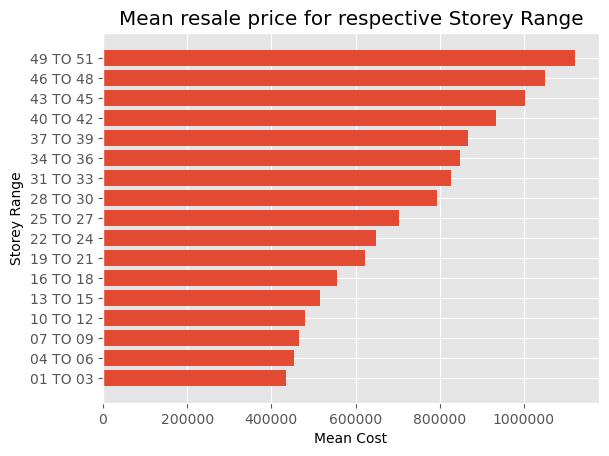

In [27]:


data = np.genfromtxt("./datasets/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv",
                     dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',  'U20',  'i8'], delimiter=",",names=True)

listOfStoreys = np.unique(data[:]["storey_range"])
listOfMean = []
for i in listOfStoreys:
    indicies = np.where(data[:]["storey_range"] == i)
    tem_sum = data[indicies]["resale_price"].mean()
    listOfMean.append(tem_sum)

fig, ax = plt.subplots()
plt.style.use("ggplot")
plt.title("Mean resale price for respective Storey Range")
plt.ylabel("Storey Range")
plt.xlabel("Mean Cost")
plt.ticklabel_format(style='plain', axis='x')
ax.barh(listOfStoreys,listOfMean)
plt.show()

From the above bar graph, we can conclude that the higher the storey range, the higher the resale price. Proving my hypothesis, "Storey range does not affect Resale Price", wrong.

This also tells me that there is a demand for high-rise HDB buildings and Resale Flats in Singapore.

From the findings, I recommend resale flats buyers to consider if having a high storey flat is important to them and if it is worth the higher price they pay.

<h1>Analysis 4</h1>
<h2>"What is the most popular HDB type among resale flats?"</h2>
<h3>Hypothesis: "4 Room is the most popular HDB type among resale flats"</h3>
<hr>
I will be using the dataset I have found on data.gov.sg, "Number of Resale Applications Registered by Flat Type, by Quarter". The columns are quarter,flat_type,no_of_resale_applications.

There a few things on the dataset that needed amendment. There was inconsistent naming for the Flat Type and the data dated all the way to 2007 and was sampled every yearly quarter.

I changed the year-quarter format of 'quarter' column to year. I then only used data from 2017 onwards to follow my other analysis that has been done, to keep my findings related.




/tmp/ipykernel_3887/2481273028.py:43: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(plt,labels=labels,loc='center left', bbox_to_anchor = (-0.1,1.))


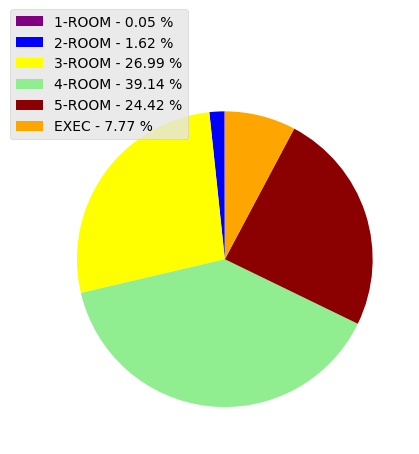

In [28]:


data = np.genfromtxt('./datasets/number-of-resale-applications-registered-by-flat-type.csv', dtype=['U8','U8','i8'],delimiter= ',',names=True)

for i in range(len(data)):
    if data["flat_type"][i] == "1-room":
        data["flat_type"][i] = '1-ROOM'
    elif data["flat_type"][i] == '2-room':
        data["flat_type"][i] = '2-ROOM'
    elif data['flat_type'][i] == '3-room':
        data["flat_type"][i] = '3-ROOM'
    elif data['flat_type'][i] == '4-room':
        data["flat_type"][i] = '4-ROOM'
    elif data['flat_type'][i] == '5-room':
        data['flat_type'][i] = '5-ROOM'
    elif data['flat_type'][i] == 'Executiv':
        data['flat_type'][i] = "EXEC"


unique_years = np.unique([row[0][:4] for row in data])
data_2020_onwards = []
for i in data:
    year_quarter = i[0]  # Assuming the "year-quarter" column is at index 0 in each tuple
    
    if year_quarter[:4] >= '2017':
        data_2020_onwards.append(i)


flat = np.unique([data[1] for data in data_2020_onwards])
numbers = []


for i in flat:
    numbers.append(data[data['flat_type'] == i]['no_of_resale_applications'].sum())

total = sum(numbers)

# Changes sums into percentages
for i in range(len(numbers)):
    numbers[i] = (numbers[i]/total)*100
colors = ["purple","blue","yellow","lightgreen","darkred","orange"]
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(flat,numbers)]
plt.pie(numbers,startangle=90,colors=colors)

plt.legend(plt,labels=labels,loc='center left', bbox_to_anchor = (-0.1,1.))
plt.show()



From the observations I gathered from the pie chart above,

My hypothesis "4 Room is the most popular HDB type among resale flats" was proven correct.

As seen from the pie chart, 4-Room Resale Flats is the has the most applications for Resale Flats.

It is also observed that 3-Room also has a higher percentage than 5-room, giving me insight that there is a higher percentage of Singaporean families that would have less than 5 members as they do not need that many rooms.

With this information, I can assure that resale flats buyers who are looking for 4 Room resale flats will be able to find one as it has the biggest supply.

<h1>Analysis 5 </h1>
<h2>Does floor area affect resale price?</h2>
<h3>Hypothesis: "The greater the amount of floor area, the greater the Resale Price of the flat is"</h3>
<hr>
For this analysis, I will be using data from the past 10 years. 
As in Analysis 2, I concluded that the most recent time where there was not much change in the price of each flat type was from 2012 onwards, I will be using data from 2012 onwards to prove my hypothesis.

This helps to reduce other factors that may affect the resale price, as all flat types saw the same trend. Thus allowing me to get a fairer conclusion to the question at hand.



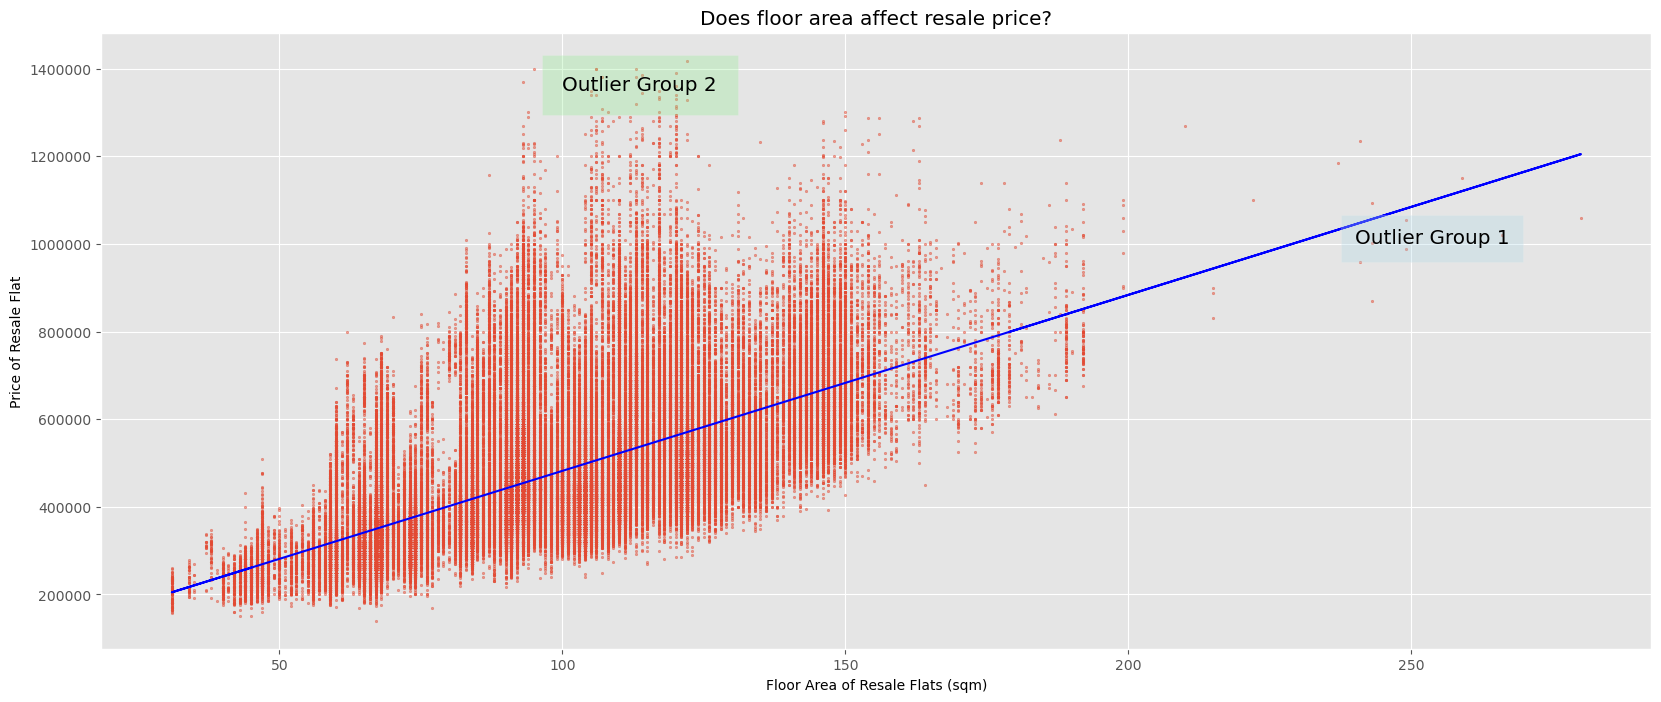

In [34]:
data2012_2014 = np.genfromtxt('./datasets/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv',
                               dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',   'i8'],
                                delimiter=",",names=True)
data2014_2016 = np.genfromtxt('./datasets/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv',
                               dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',    'i8'],
                                usecols=(0,1,2,3,4,5,6,7,8,10),delimiter=",",names=True)
data2017_onwards = np.genfromtxt('./datasets/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv',
                                  dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',    'i8'],
                                   usecols=(0,1,2,3,4,5,6,7,8,10), delimiter=",",names=True)
#combine all data into one np arr
combined_data = np.concatenate([data2012_2014,data2014_2016,data2017_onwards])

floor_area = []
price = []
for i in range(len(combined_data)):

    if combined_data['resale_price'][i] > 0:
        floor_area.append(combined_data['floor_area_sqm'][i])
        price.append(combined_data['resale_price'][i])

a,b = np.polyfit(floor_area,price,deg=1)
fig, ax = plt.subplots(1, figsize = (20,8))
ax.scatter(x = floor_area, y = price, s = 3, alpha = 0.5)
ax.plot(floor_area,a*np.float64(floor_area) + b,'b')
ax.text(240,1000000,"Outlier Group 1", bbox = {'facecolor': 'lightblue', 'alpha':0.3, 'pad' : 10,}, fontsize = 'x-large')
ax.text(100,1350000,"Outlier Group 2", bbox = {'facecolor': 'lightgreen', 'alpha':0.3, 'pad' : 15,}, fontsize = 'x-large')
plt.title("Does floor area affect resale price?")
plt.xlabel("Floor Area of Resale Flats (sqm)")
plt.ylabel("Price of Resale Flat")
plt.ticklabel_format(style='plain', axis='y')

From the scatter plot above,

I would say that my hypothesis, "The greater the amount of floor area, the greater the resale price", is largely true. This can be seen from the regression line that I plotted, depicting an upward trend.

However, within my scatter plot I have identified 2 Outlier Groups within the dataset. 

In Outlier Group 1, it is seen that there are plots depicting that there are resale flats with floor areas ranging from an estimated 210sqm - 280sqm being sold for the same price as a flat with 150sqm of floor area. This is unusual as my trend depicts that the more floor area the flats have, the greater the resale price should be, but Outlier Group 1 suggests otherwise. My hypothesis on the factors affecting the resale prices of Outlier 1 Group's flats are of the following; Older flat with lesser remaining lease, location of flat is not ideal, existing problems within the flat, neighbourhood with bad reputation.

In Outlier Group 2, it is seen that flats with an estimated sqm of 80-130 are going for prices above 1200000. This is unusual as flats with the same amount of floor area are mostly going for price ranges around 350000-800000, as seen from the scatter plot. My hypoethesis on the factors affecting the resale prices of Outlier Group 2's flats are of the following; Newer flats with long remaining lease period, Closer to Central part of Singapore, Better Facilities in the Neighbourhood, Greater Convenience than usual flats (Access to Malls, Markets, Transport), Newly Renovated.

From the scatter plot, I would recommend for future house buyers looking at resale flats, to try and look for flats with 130-150sqm floor area for around $600000 as the most economic/worthy purchase or if the resale prices fall under the regression line.

<h1> Analysis 6</h1>
<h2>"Does town area affect rent? Which town has the most expensive rent?"</h2>
<h3>Hypothesis:"Town Area does affect Rent, Central has the most expensive rent."</h3>
<hr>
My reason for my hypothesis is that certain town areas may have more accessibility. For example, more malls in the area or newer facilities. And as Central would be the most accessible to the City and malls, I believe that it has the most expensive rent.

I will be using the Median Rent By Town and Flat Type dataset. In this dataset there was some data cleaning required, there was inconsistent naming in the 'town' column and there are some '-'/'na' values in the 'median_rent' column. Data cleaning was carried out, 'town' naming was corrected and '-'/'na' values were replaced with 0.

<BarContainer object of 27 artists>

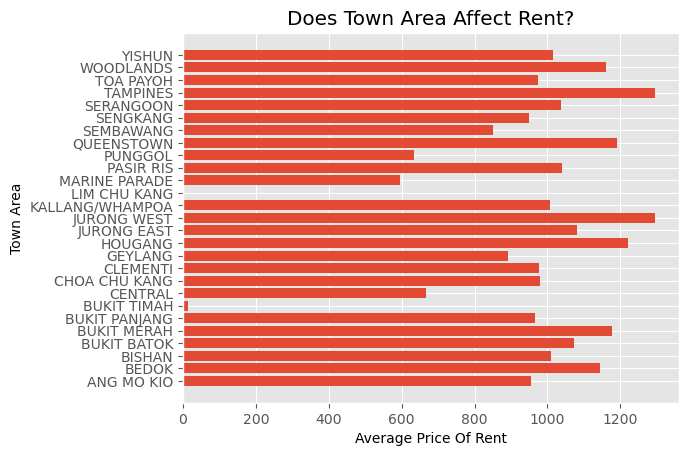

In [30]:


data = np.genfromtxt('./datasets/median-rent-by-town-and-flat-type.csv',dtype = ['U10','U20','U10','i8'],  filling_values = {3:0}, delimiter = ',', names = True)


for n in range(len(data)):
    data['quarter'][n] = data['quarter'][n][:4]
data['town'] = np.char.strip(data['town'])
data['town'][data['town'] == 'KALLANG/ WHAMPOA'] = 'KALLANG/WHAMPOA'
town = np.unique(data['town'])
avg_price = []
for i in town :
   avg_price.append(np.mean(data[data['town']== i]['median_rent']))

plt.title("Does Town Area Affect Rent?")
plt.xlabel("Average Price Of Rent")
plt.ylabel("Town Area")
plt.barh(town,avg_price)

From the bar chart above,

Jurong West and Tampines had the highest Average Price Of Rent. Proving my hypothesis,"Town Area does affect Rent, Central has the most expensive rent" wrong.

However, I would not find the observation reliable as in the bar chart Bukit Timah and Lim Chu Kang had almost no data and due to the the '-'/'na' values that were replaced with 0 during data cleaning, some factors would have been left out. For example, Jurong West and Tampines may only have had 5-Room rent data used as the average thus resulting in having the highest rent. Vice versa, could apply for the other Towns as well.

Thus with this in consideration, I cannot make any conclusive findings and cannot make any recommendations of which town people should rent a house from.

## **References**
<hr>
URLS:<br> 
https://data.gov.sg/dataset/resale-flat-prices<br>
https://data.gov.sg/dataset/median-rent-by-town-and-flat-type <br>
https://data.gov.sg/dataset/number-of-resale-applications-registered-by-flat-type-quarterly